# Titanic dataset

In [2]:
import sys
print(sys.executable)

c:\ProgramData\Anaconda3\envs\tf\python.exe


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [4]:
#Load dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
#pop function return and modification is important
dftrain.head()


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [5]:
print(dftrain.shape)
dftrain.describe()

(627, 9)


,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


<Axes: >

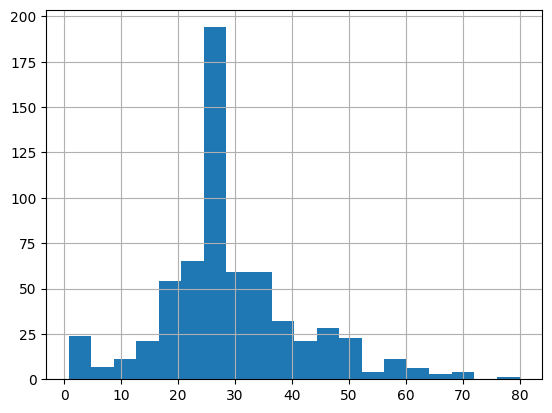

In [6]:
dftrain.age.hist(bins=20)

<Axes: ylabel='sex'>

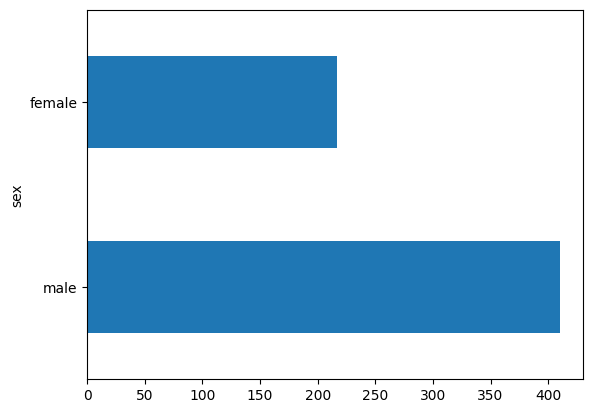

In [7]:
dftrain.sex.value_counts().plot(kind="barh")

Text(0.5, 0, '% survive')

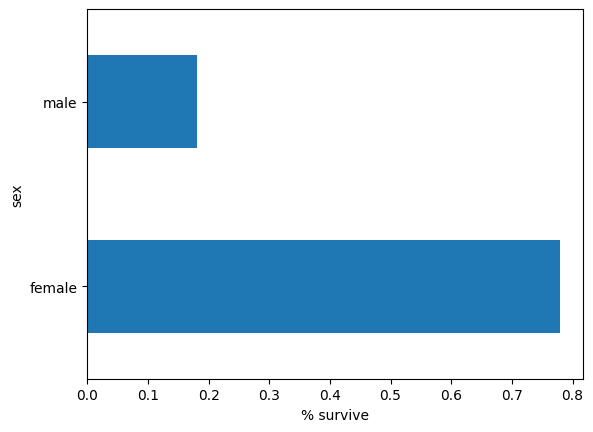

In [8]:
pd.concat([dftrain,y_train],axis=1).groupby("sex").survived.mean().plot(kind="barh").set_xlabel("% survive")

In [11]:
#Categorical and Numeric columns
cat_cols = ["sex","n_siblings_spouses","parch","class","deck","embark_town","alone"]
num_cols = ["age","fare"]

feature_cols = []
for feat in cat_cols:
    vocab = dftrain[feat].unique() #get all unique names of a columns
    feature_cols.append(tf.feature_column.categorical_column_with_vocabulary_list(feat,vocab))
for feat in num_cols:
    feature_cols.append(tf.feature_column.numeric_column(feat,dtype=tf.float32))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [13]:
# Input function
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function(): #inner function, this will be returned
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
        #it creates tf.data.Dataset object with data and its label
        if shuffle:
            ds = ds.shuffle(1000) #randomize order of data
        ds = ds.batch(batch_size).repeat(num_epochs) #split dataset into batches and process for #of epochs
        return ds #return a batch of the dataset
    return input_function #return a function object for use

In [14]:
train_input_fn = make_input_fn(dftrain,y_train)
eval_input_fn = make_input_fn(dfeval,y_eval,num_epochs=1,shuffle=False)

In [15]:
# Creating the Model
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_cols)

"""
# Define a linear model using tf.keras.Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(feature_cols),)),  # Input layer
    tf.keras.layers.Dense(units=1, activation=None)  # Linear output layer with 1 unit (for binary classification)
])

# Compile the model with appropriate loss and optimizer
model.compile(optimizer='adam',  # You can choose a different optimizer if needed
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  # Use appropriate loss function
              metrics=['accuracy'])  # Add any metrics you want to track during training

# Define your input function
train_input_fn = make_input_fn(data_df, label_df)

# Train the model
model.fit(train_input_fn(), epochs=num_epochs)
"""

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Koparan\\AppData\\Local\\Temp\\tmp3q2gtwvq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '

In [17]:
# Training and Result
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)
print(result["accuracy"])

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Koparan\AppData\Local\Temp\tmp3q2gtwvq\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
Instructions for updating:
Use tf.keras instead